<a href="https://colab.research.google.com/github/Oddi17/SemanticSegmentationLesson/blob/main/modelUnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda


################################################################
def multi_unet_model(n_classes,IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=1):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    
    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    #model.summary()
    
    return model

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/soiling_dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('/content/dataset/')

In [ ]:
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image_directory = '/content/dataset/train/rgbImages/'
mask_directory = '/content/dataset/train/gtLabels/'

images = sorted(glob.glob('/content/dataset/train/rgbImages/*.png'))
masks = sorted(glob.glob('/content/dataset/train/gtLabels/*.png'))

In [ ]:
SIZE_X = 128 
SIZE_Y = 128
n_classes=4 #Number of classes for segmentation

In [ ]:
train_images = []
#images = os.listdir(image_directory)
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
        #print(image_name)
        #print(image_directory+image_name)
        image = cv2.imread(image_name, 0)
        #image = cv2.imread(image_name, 1) #????????????????????? ?????
        #image = Image.fromarray(image)
        #image = image.resize((SIZE, SIZE))
        #image_dataset.append(np.array(image))
        img = cv2.resize(image,(SIZE_Y, SIZE_X))
        train_images.append(img)

#Convert list to array for machine learning processing   
train_images = np.array(train_images)        

In [ ]:
train_masks = []
#masks = os.listdir(mask_directory)
for i, image_name in enumerate(masks):
        image = cv2.imread(image_name, 0)
        #image = Image.fromarray(image)
        #image = image.resize((SIZE, SIZE))
        #mask_dataset.append(np.array(image))
        img = cv2.resize(image, (SIZE_Y, SIZE_X))
        train_masks.append(img)

#Convert list to array for machine learning processing   
train_masks = np.array(train_masks)       

In [ ]:
np.unique(train_masks)

array([0, 1, 2, 3], dtype=uint8)

In [ ]:
###############################################
#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)

#################################################

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3])

In [ ]:
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

In [ ]:
print(train_images.shape)
print(train_masks_input.shape)

(4000, 128, 128, 1)
(4000, 128, 128, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks_input, test_size = 0.05, random_state = 0)

In [ ]:
#Create a subset of data for quick testing
#Picking 10% for testing and remaining for training
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)

In [ ]:
#Further split training data t a smaller subset for quick testing of models
X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [ ]:
print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled 
print(X_train.shape)

Class values in the dataset are ...  [0 1 2 3]
(3800, 128, 128, 1)


In [ ]:
from keras.utils import to_categorical

train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

In [ ]:
print(y_train_cat.shape)

(3800, 128, 128, 4)


In [ ]:
test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [ ]:
print(y_test_cat.shape)

(200, 128, 128, 4)


In [ ]:
from sklearn.utils import class_weight #тут просто неправильно названы переменные, лучше используй следующий шаг
class_weights = class_weight.compute_class_weight('balanced',np.unique(train_masks_reshaped_encoded),train_masks_reshaped_encoded)
print("Class weights are...:", class_weights)

TypeError: ignored

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_masks_reshaped_encoded), y= train_masks_reshaped_encoded)
print("Class weights are...:", class_weights)

Class weights are...: [0.67072398 2.03819653 1.22214846 0.83318565]


In [ ]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

In [ ]:
model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  160         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
history = model.fit(X_train, y_train_cat, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=30, ## было установлено 50 я поменял на 10
                    validation_data=(X_test, y_test_cat), 
                    #class_weight=class_weights,
                    shuffle=False)

Epoch 1/30
238/238 [==============================] - 24s 49ms/step - loss: 1.1618 - accuracy: 0.4718 - val_loss: 1.0291 - val_accuracy: 0.5834
Epoch 2/30
238/238 [==============================] - 10s 44ms/step - loss: 0.7887 - accuracy: 0.6670 - val_loss: 0.7971 - val_accuracy: 0.6591
Epoch 3/30
238/238 [==============================] - 10s 44ms/step - loss: 0.6553 - accuracy: 0.7260 - val_loss: 0.6474 - val_accuracy: 0.7223
Epoch 4/30
238/238 [==============================] - 11s 44ms/step - loss: 0.5706 - accuracy: 0.7671 - val_loss: 0.5871 - val_accuracy: 0.7548
Epoch 5/30
238/238 [==============================] - 11s 45ms/step - loss: 0.5104 - accuracy: 0.7949 - val_loss: 0.4826 - val_accuracy: 0.8054
Epoch 6/30
238/238 [==============================] - 11s 45ms/step - loss: 0.4585 - accuracy: 0.8169 - val_loss: 0.4433 - val_accuracy: 0.8217
Epoch 7/30
238/238 [==============================] - 11s 45ms/step - loss: 0.4280 - accuracy: 0.8305 - val_loss: 0.4189 - val_accuracy:

In [ ]:
model.save('test.hdf5')

In [ ]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")

7/7 [==============================] - 1s 28ms/step - loss: 0.3046 - accuracy: 0.8890
Accuracy is =  88.90121579170227 %


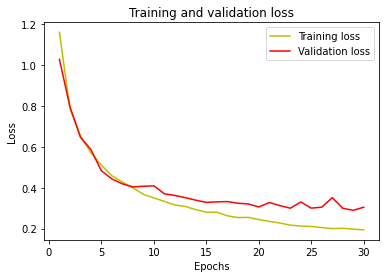

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(acc)

0.8890121579170227


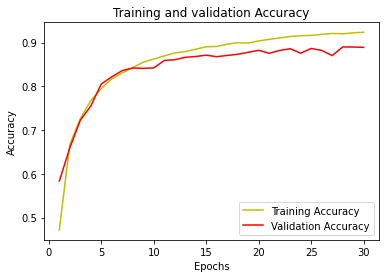

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#################################
#model = get_model()
#model.load_weights('sandstone_50_epochs_catXentropy_acc.hdf5')  
#model.load_weights('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')
#model.load_weights('/drive/MyDrive/test.hdf5') 
model.load_weights('test.hdf5')

#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

##################################################

NameError: ignored

In [ ]:
print(y_pred.shape)
print(y_pred_argmax.shape)


(200, 128, 128, 4)
(200, 128, 128)


In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.75571966


In [ ]:
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)


#plt.imshow(train_images[0, :,:,0], cmap='gray')
#plt.imshow(train_masks[0], cmap='gray')

[[1110560.   53505.   19662.    3748.]
 [  18522.  265242.   88067.    7887.]
 [   9325.   31297.  569244.   41617.]
 [   2137.    8211.   79707.  968069.]]
IoU for class1 is:  0.91219497
IoU for class2 is:  0.56108445
IoU for class3 is:  0.67854464
IoU for class4 is:  0.8710544


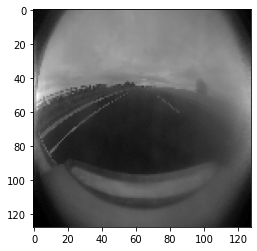

In [ ]:
plt.imshow(train_images[0, :,:,0], cmap='gray')

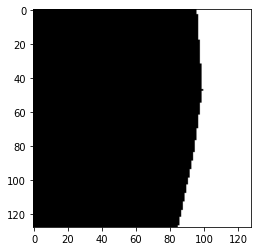

In [ ]:
plt.imshow(train_masks[0], cmap='gray')

1/1 [==============================] - 0s 17ms/step


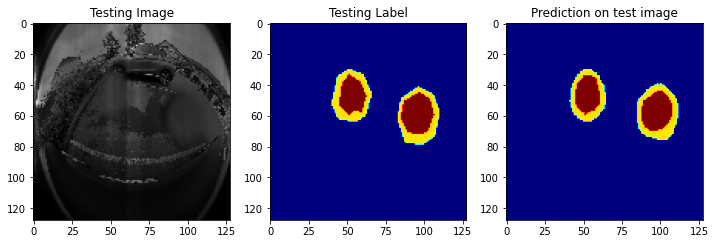

In [ ]:
#Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')  
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()

In [ ]:
pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#####################################################################

#Predict on large image

#Apply a trained model on large image

from patchify import patchify, unpatchify

large_image = cv2.imread('drive/MyDrive/0118_MVR.png', 0)
large_image  = cv2.resize(large_image,(SIZE_Y, SIZE_X))

#This will split the image into small images of shape [3,3]
patches = patchify(large_image, (128, 128), step=128)  #Step=256 for 256 patches means no overlap

In [ ]:
predicted_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        print(i,j)
        
        single_patch = patches[i,j,:,:]       
        single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)
        single_patch_input=np.expand_dims(single_patch_norm, 0)
        single_patch_prediction = (model.predict(single_patch_input))
        single_patch_predicted_img=np.argmax(single_patch_prediction, axis=3)[0,:,:]

        predicted_patches.append(single_patch_predicted_img)

0 0
1/1 [==============================] - 0s 53ms/step


In [ ]:
predicted_patches = np.array(predicted_patches)

predicted_patches_reshaped = np.reshape(predicted_patches, (patches.shape[0], patches.shape[1], 128,128) )

reconstructed_image = unpatchify(predicted_patches_reshaped, large_image.shape)

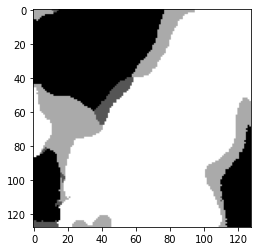

In [ ]:
plt.imshow(reconstructed_image, cmap='gray')
#plt.imsave('data/results/segm.jpg', reconstructed_image, cmap='gray')


(array([4609.,    0.,    0.,  293.,    0.,    0., 2041.,    0.,    0.,
        9441.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

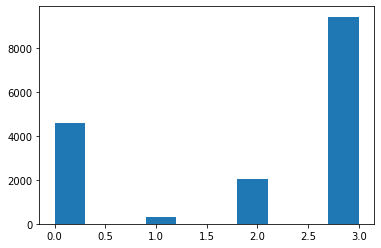

In [ ]:
plt.hist(reconstructed_image.flatten())  #Threshold everything above 0

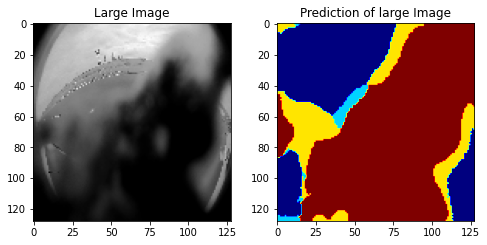

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Large Image')
plt.imshow(large_image, cmap='gray')
plt.subplot(222)
plt.title('Prediction of large Image')
plt.imshow(reconstructed_image, cmap='jet')
plt.show()

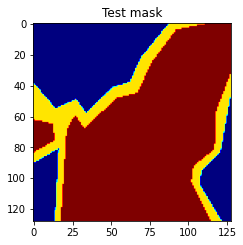

In [ ]:
large_image = cv2.imread('drive/MyDrive/mask/0118_MVR.png', 0)
large_image  = cv2.resize(large_image,(SIZE_Y, SIZE_X))
plt.figure(figsize=(8, 8))
plt.subplot(223)
plt.title('Test mask')
plt.imshow(large_image, cmap='jet')